In [1]:
import pandas as pd
import math
import matplotlib as mpl
#mpl.use('pdf')
import matplotlib.pyplot as plt
import matplotlib.font_manager
import numpy as np
from collections import OrderedDict
import matplotlib
import seaborn as sns
#Red
red1= sns.color_palette("Reds_d",1)
red2= sns.color_palette("Reds_d",2)
red3= sns.color_palette("Reds_d",3)
red4= sns.color_palette("Reds_d",4)
red5= sns.color_palette("Reds_d",5)
red6= sns.color_palette("Reds_d",6)
red7= sns.color_palette("Reds_d",7)
red8= sns.color_palette("Reds_d",8)

#YellowGreen
yg1= sns.color_palette("YlGn_d",1)
yg2= sns.color_palette("YlGn_d",2)
yg3= sns.color_palette("YlGn_d",3)
yg4= sns.color_palette("YlGn_d",4)
yg5= sns.color_palette("YlGn_d",5)
yg7= sns.color_palette("YlGn_d",7)

#GreenBlue
gb1= sns.color_palette("GnBu_d",1)
gb2= sns.color_palette("GnBu_d",2)
gb3= sns.color_palette("GnBu_d",3)
gb4= sns.color_palette("GnBu_d",4)
gb5= sns.color_palette("GnBu_d",5)
gb6= sns.color_palette("GnBu_d",6)
gb7= sns.color_palette("GnBu_d",7)
gb8= sns.color_palette("GnBu_d",8)

cp2 = list(map(lambda x: sns.desaturate(x,0.9),[red7[2],gb7[4]]))
cp2v1 = list(map(lambda x: sns.desaturate(x,0.9),[red7[2],yg7[0]]))
cp3 = list(map(lambda x: sns.desaturate(x,0.9),[yg7[0],gb7[4],red7[2]]))
#cp4 = list(map(lambda x: sns.desaturate(x,0.9),red1+gb2+yg1))
cp2_2 = list(map(lambda x: sns.desaturate(x,0.9),[red7[0],red7[3],gb7[4],gb7[6]]))
cp_total_spectrum = list(map(lambda x: sns.desaturate(x,0.9),gb7 + yg7 + red7))

In [2]:
sns.set_palette(cp2)
sns.color_palette()

[(0.8807358708189157, 0.32277047289504046, 0.2744659746251443),
 (0.2649160579264386, 0.5270152505446624, 0.6269460463924131)]

In [3]:
sns.set_palette(cp2v1)
sns.color_palette()

[(0.8807358708189157, 0.32277047289504046, 0.2744659746251443),
 (0.6120315263360248, 0.8081330257593234, 0.5357962322183777)]

In [4]:
sns.set_palette(cp3)
sns.color_palette()

[(0.6120315263360248, 0.8081330257593234, 0.5357962322183777),
 (0.2649160579264386, 0.5270152505446624, 0.6269460463924131),
 (0.8807358708189157, 0.32277047289504046, 0.2744659746251443)]

In [5]:
cpbasic = list(map(lambda x: sns.desaturate(x,0.9),['g','r','b','orange','grey']))
sns.set_palette(cpbasic)
sns.color_palette()

[(0.025000000000000022, 0.475, 0.025000000000000022),
 (0.95, 0.050000000000000044, 0.050000000000000044),
 (0.050000000000000044, 0.050000000000000044, 0.95),
 (0.95, 0.6323529411764707, 0.050000000000000044),
 (0.5019607843137255, 0.5019607843137255, 0.5019607843137255)]

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


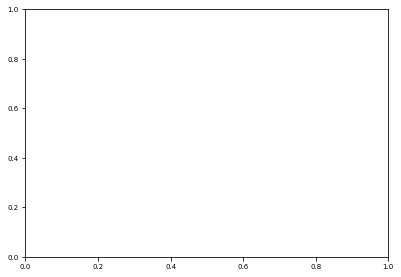

In [6]:
font=8
plt.rc('font', family='serif', serif='Times')
#plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=font-1)
plt.rc('ytick', labelsize=font-1)
plt.rc('axes', labelsize=font)


# width as measured in inkscape
width = 3.487
height = width / 1.618*3/2

fig, axs = plt.subplots()
#fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)
fig.subplots_adjust(left=.15, bottom=.08, right=.99, top=.94)

#import seaborn as sns
#sns.set(style="whitegrid", palette=cpbasic,font_scale=0.2, rc={"lines.linewidth": 1})

# Read GPU Data (panastas)

In [7]:
import string as str
reps = 1
implementations = ['cuSPARSE_csr11', 'cuSPARSE_coo11', 'CSR5_9', 'cuSPARSE_csr9-2', 'cuSPARSE_hyb9-2']
#['OMP_csr-40', 'cuSPARSE_csr', 'cuSPARSE_hyb', 'cuSPARSE_bsr-2', 'cuSPARSE_bsr-4', 'cuSPARSE_bsr-16', 'cuSPARSE_bsr-64', 'cuCSR5']
dtypes=['D']
for dtype in dtypes:
    #Unified read
    fname = "silver1-TeslaV100_dtype-%s_run_dataset.csv" % dtype
    inputdata_GPU = pd.read_csv('../Benchmarks/%s' % fname, names = 
                            ['mtx_name','distribution','placement','diagonal_factor', 'seed','m','n','nz',
                             'density','A_mem_footprint','mem_range','avg_nz_row','std_nz_row','avg_bandwidth',
                            'std_bandwidth','avg_scattering','std_scattering','implementation','time','gflops','W_avg', 'J_estimated'])
    inputdata_GPU['System'] = 'TeslaV100'
   # print(inputdata_GPU.head(2))

# Read CPU Data (dgal)

In [8]:
    fname = "hawk_csr_naive_normal_4-2048_d.out"
    inputdata_csrnaive = pd.read_csv('../Benchmarks/%s' % fname, names =
                        ['mtx_name','distribution','placement','diagonal_factor', 'seed','m','n','nz',
                         'density','A_mem_footprint','mem_range','avg_nz_row','std_nz_row','avg_bandwidth',
                        'std_bandwidth','avg_scattering','std_scattering','implementation','time','gflops','W_avg', 'J_estimated'])
    inputdata_csrnaive['System'] = 'HawkAmdRome'
    inputdata_csrnaive['implementation'] = 'Naive-CSR-CPU'
    #print(inputdata_csrnaive.head(2))

In [9]:
    fname = "hawk_csr5_normal_4-2048_d.out"
    inputdata_csr5cpu = pd.read_csv('../Benchmarks/%s' % fname, names =
                        ['mtx_name','distribution','placement','diagonal_factor', 'seed','m','n','nz',
                         'density','A_mem_footprint','mem_range','avg_nz_row','std_nz_row','avg_bandwidth',
                        'std_bandwidth','avg_scattering','std_scattering','implementation','time','gflops','W_avg', 'J_estimated'])
    inputdata_csr5cpu['System'] = 'HawkAmdRome'
    inputdata_csr5cpu['implementation'] = 'CSR5-CPU'
    #print(inputdata_csr5cpu.head(2))

In [10]:
    fname = "hawk_mkl_ie_normal_4-2048_d.out"
    inputdata_mkl = pd.read_csv('../Benchmarks/%s' % fname, names =
                        ['mtx_name','distribution','placement','diagonal_factor', 'seed','m','n','nz',
                         'density','A_mem_footprint','mem_range','avg_nz_row','std_nz_row','avg_bandwidth',
                        'std_bandwidth','avg_scattering','std_scattering','implementation','time','gflops','W_avg', 'J_estimated'])
    inputdata_mkl['System'] = 'HawkAmdRome'
    #print(inputdata_mkl.head(2))

In [11]:
    fname = "hawk_mkl_ie_normal_4-2048_d_t128.out"
    inputdata_mkl_128 = pd.read_csv('../Benchmarks/%s' % fname, names =
                        ['mtx_name','distribution','placement','diagonal_factor', 'seed','m','n','nz',
                         'density','A_mem_footprint','mem_range','avg_nz_row','std_nz_row','avg_bandwidth',
                        'std_bandwidth','avg_scattering','std_scattering','implementation','time','gflops','W_avg', 'J_estimated'])
    inputdata_mkl_128['System'] = 'HawkAmdRome'
    inputdata_mkl_128['implementation'] = 'MKL_IE_128'
    #print(inputdata_mkl_128.head(2))

# Read FPGA Data (pmpakos)

In [12]:
    fname = "xilinx_spmv_4-2048_small_normal_dataset_dtype-%s.csv" % dtype
    inputdata_FPGA = pd.read_csv('../Benchmarks/%s' % fname, names = 
                    ['mtx_name','distribution','placement','diagonal_factor', 'seed','m','n','nz',
                     'density','A_mem_footprint','mem_range','avg_nz_row','std_nz_row','avg_bandwidth',
                    'std_bandwidth','avg_scattering','std_scattering','implementation','time','gflops','W_avg', 'J_estimated'])
    inputdata_FPGA['System'] = 'FPGA'
    #print(inputdata_FPGA.head(2))

# Fix problem with scattering (being calculated before dividing with nr_cols) 

# <font color='red'>FIXME</font> 
(Don't know if this issue occurs any more with dgal generator)


In [13]:
    # MPAKOS fix columns div
    inputdata_GPU['avg_scattering'] = inputdata_GPU['avg_scattering']/inputdata_GPU['n']
    inputdata_GPU['std_scattering'] = inputdata_GPU['std_scattering']/inputdata_GPU['n']
    

# Concatenate all data, place in *inputdata* dataframe

In [14]:
    # Merge the results
    inputdata = pd.concat([inputdata_GPU,inputdata_csrnaive])
    inputdata = pd.concat([inputdata,inputdata_csr5cpu])
    inputdata = pd.concat([inputdata,inputdata_mkl])
    inputdata = pd.concat([inputdata,inputdata_mkl_128])
    inputdata = pd.concat([inputdata,inputdata_FPGA])

In [15]:
    # Group per reps, take mean
    groupreps = inputdata.groupby(['mtx_name','distribution','placement','diagonal_factor', 'seed','m','n', 
                             'density','A_mem_footprint','mem_range','nz','avg_nz_row','std_nz_row','avg_bandwidth',
                            'std_bandwidth','avg_scattering','std_scattering', 'implementation','System']).mean().reset_index()

---
# Initiate plotting phase

In [16]:
    plot_x_axis = ['mem_range']
    select_criterion = (groupreps['avg_nz_row'] > 19) & ( groupreps['std_nz_row'] > 1 ) & ( groupreps['std_nz_row'] < 8.03) & ( groupreps['implementation'] == 'Xilinx_SpMV') # & (groupreps['nz'] > 100000)
    select_str = 'avg_nz_row > 19, std_nz_row > 1 , std_nz_row < 8.03\nImplementation = Xilinx_SpMV'
    select_str_id = select_str.replace('=', 'eq').replace('<', 'l').replace('>', 'g').replace(', ', '_').replace(',', '_').replace('\n', '_').replace(' ', '-')
    groupreps_select = groupreps[select_criterion]
    #groupbench = groupreps_select.groupby(['mtx_name','distribution','placement','diagonal_factor', 'seed','m','n', 'density','A_mem_footprint','mem_range','nz','avg_nz_row','std_nz_row','avg_bandwidth', 'std_bandwidth','avg_scattering','std_scattering'], as_index =False)
    
    plot_x_axis = [] # remove this line, if you want to plot Xilinx_SpMV results
    if ('mem_range' in plot_x_axis):
        #groupreps_select_sorted = groupreps_select.assign(sorter_col = groupreps_select['mem_range'].split('-').split('[')[1]).sort_values('sorter_col').drop('sorter_col', axis=1)
        groupreps_select_sorted = groupreps_select.sort_values('A_mem_footprint')
        fig, axs = plt.subplots()
        sns_plot = sns.boxplot(data=groupreps_select_sorted, x="mem_range", y="gflops", ax=axs)
        axs.set_title('Dataset %s' %(select_str))
        fig.subplots_adjust(left=.1, bottom=.2, right=.99, top=.88)
        plt.xticks(rotation=30)
        fig.savefig('./Plot_tries/Select_%s_plot_per_memrange.pdf' % (select_str_id) )
        plt.close()

In [17]:
    if ('implementation' in plot_x_axis):
        fig, axs = plt.subplots()
        sns_plot = sns.boxplot(data=groupreps_select, x="implementation", y="gflops", ax=axs)
        axs.set_title('Dataset %s' %(select_str))
        fig.subplots_adjust(left=.1, bottom=.2, right=.99, top=.94)
        plt.xticks(rotation=30)
        fig.savefig('./Plot_tries/Select_%s_plot_per_format.pdf' % (select_str_id) )
        plt.close()

In [18]:
    if ('distribution' in plot_x_axis):
        fig, axs = plt.subplots() 
        sns_plot = sns.boxplot(data=groupreps_select, x="distribution", y="gflops", ax=axs)
        axs.set_title('Dataset %s' %(select_str))
        fig.subplots_adjust(left=.1, bottom=.2, right=.99, top=.94)
        plt.xticks(rotation=30)
        fig.savefig('./Plot_tries/Select_%s_plot_per_dist.pdf' % (select_str_id) )
        plt.close()

In [19]:
    if ('density' in plot_x_axis):
        fig, axs = plt.subplots() 
        sns_plot = sns.scatterplot(data=groupreps_select, x="density", y="gflops", ax=axs)
        axs.set_title('Dataset %s' %(select_str))
        fig.subplots_adjust(left=.1, bottom=.2, right=.99, top=.94)
        plt.xticks(rotation=30)
        fig.savefig('./Plot_tries/Select_%s_plot_per_density.pdf' % (select_str_id) )
        plt.close()

In [20]:
    if ('A_mem_footprint' in plot_x_axis):
        fig, axs = plt.subplots() 
        sns_plot = sns.scatterplot(data=groupreps_select, x="A_mem_footprint", y="gflops", ax=axs)
        axs.set_title('Dataset %s' %(select_str))
        fig.subplots_adjust(left=.1, bottom=.2, right=.99, top=.94)
        plt.xticks(rotation=30)
        fig.savefig('./Plot_tries/Select_%s_plot_per_memfoot.pdf' % (select_str_id) )
        plt.close()

In [21]:
    if ('m' in plot_x_axis):
        fig, axs = plt.subplots() 
        sns_plot = sns.boxplot(data=groupreps_select, x="m", y="gflops", ax=axs)
        axs.set_title('Dataset %s' %(select_str))
        fig.subplots_adjust(left=.1, bottom=.2, right=.99, top=.94)
        plt.xticks(rotation=30)
        fig.savefig('./Plot_tries/Select_%s_plot_per_m.pdf' % (select_str_id) )
        plt.close()
        #fig, axs = plt.subplots() 
        #sns_plot = sns.boxplot(data=groupreps_select, x="n", y="gflops", ax=axs)
        #axs.set_title('Dataset %s' %(select_str))
        #fig.savefig('./Plot_tries/Select_%s_plot_per_n.pdf' % (select_str_id) )
        #plt.close()

In [22]:
    if ('nz' in plot_x_axis):
        fig, axs = plt.subplots() 
        sns_plot = sns.scatterplot(data=groupreps_select, x="nz", y="gflops", ax=axs)
        axs.set_title('Dataset %s' %(select_str))
        fig.subplots_adjust(left=.1, bottom=.2, right=.99, top=.94)
        plt.xticks(rotation=30)
        fig.savefig('./Plot_tries/Select_%s_plot_per_nz.pdf' % (select_str_id) )
        plt.close()

In [23]:
    if ('avg_nz_row' in plot_x_axis):
        fig, axs = plt.subplots() 
        sns_plot = sns.scatterplot(data=groupreps_select, x="avg_nz_row", y="gflops", ax=axs)
        axs.set_title('Dataset %s' %(select_str))
        fig.subplots_adjust(left=.1, bottom=.2, right=.99, top=.94)
        plt.xticks(rotation=30)
        fig.savefig('./Plot_tries/Select_%s_plot_per_avg_nz_row.pdf' % (select_str_id) )
        plt.close()

In [24]:
    # Group per system, take best
    group_system = inputdata.groupby(['mtx_name','distribution','placement','diagonal_factor', 'seed','m','n', 
                             'density','A_mem_footprint','mem_range','nz','avg_nz_row','std_nz_row','avg_bandwidth',
                            'std_bandwidth','avg_scattering','std_scattering', 'System'], as_index = False)
    reslist = []
    for desc, experiment in group_system:
        best_format = experiment['implementation'].iloc[experiment['gflops'].argmax()]
        outrow = experiment[experiment['implementation'] == best_format]
        reslist.append(outrow.values.tolist()[0])
        #print(outrow.values.tolist()[0])
    group_system_best = pd.DataFrame(reslist, columns =['mtx_name','distribution','placement','diagonal_factor', 'seed','m','n','nz',
                     'density','A_mem_footprint','mem_range','avg_nz_row','std_nz_row','avg_bandwidth',
                    'std_bandwidth','avg_scattering','std_scattering','implementation','time','gflops','W_avg', 'J_estimated', 'System'])
    

---
# Q1

In [25]:
    # Q1 : Impact of memory footprint, all other features are “good”
    # device = GPU
    # average nnz/row > 20
    # Stdev nnz/row in  [1, 8.03]
    # Bandwidth = “~nnz/row” (κατά προτίμηση μαζεμένα γύρω από τη διαγώνιο τα nnz)
    # X axis : memory footprint ranges (boxplot)

    plot_x_axis_best = ['mem_range']
    select_criterion = ( group_system_best['std_nz_row'] > 1 ) \
    & ( group_system_best['avg_nz_row'] > 19) \
    & ( group_system_best['std_nz_row'] < 8.03) \
    & ((group_system_best['diagonal_factor'] == 0.5) | (group_system_best['diagonal_factor'] == 0.05)) \
    & ( group_system_best['System'] == 'TeslaV100')  # & (groupreps['nz'] > 100000)
    
    select_str = 'avg_nz_row > 19, std_nz_row > 1, std_nz_row < 8.03\ndf = 0.5,0.05, Best of System = TeslaV100'
    
    select_str_id = select_str.replace('=', 'eq').replace('<', 'l').replace('>', 'g').replace(', ', '_').replace(',', '_').replace('\n', '_').replace(' ', '-')
    groupreps_select_best = group_system_best[select_criterion]
    
    # Plot best per system with x mem ranges
    if ('mem_range' in plot_x_axis_best):
        #groupreps_select_sorted = groupreps_select.assign(sorter_col = groupreps_select['mem_range'].split('-').split('[')[1]).sort_values('sorter_col').drop('sorter_col', axis=1)
        groupreps_select_sorted = groupreps_select_best.sort_values('A_mem_footprint')
        fig, axs = plt.subplots()
        sns_plot = sns.boxplot(data=groupreps_select_sorted, x="mem_range", y="gflops", ax=axs)
        axs.set_title('Dataset %s' %(select_str))
        fig.subplots_adjust(left=.1, bottom=.2, right=.99, top=.88)
        plt.xticks(rotation=30)
        fig.savefig('./Plot_tries/Q1_Select_%s_plot_per_memrange.pdf' % (select_str_id) )
        plt.close()


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


In [26]:
    # Q1 : Impact of memory footprint, all other features are “good”
    # device = GPU
    # average nnz/row > 20
    # Stdev nnz/row in  [1, 8.03]
    # Bandwidth = “~nnz/row” (κατά προτίμηση μαζεμένα γύρω από τη διαγώνιο τα nnz)
    # X axis : avg_nz_row

    plot_x_axis_best = ['avg_nz_row']
    select_criterion = ( group_system_best['std_nz_row'] > 1 ) \
    & ( group_system_best['avg_nz_row'] > 19) \
    & ( group_system_best['std_nz_row'] < 8.03) \
    & ((group_system_best['diagonal_factor'] == 0.5) | (group_system_best['diagonal_factor'] == 0.05)) \
    & ( group_system_best['System'] == 'TeslaV100')  # & (groupreps['nz'] > 100000)
    
    select_str = 'avg_nz_row > 19, std_nz_row > 1, std_nz_row < 8.03\ndf = 0.5,0.05, Best of System = TeslaV100'
    
    select_str_id = select_str.replace('=', 'eq').replace('<', 'l').replace('>', 'g').replace(', ', '_').replace(',', '_').replace('\n', '_').replace(' ', '-')
    groupreps_select_best = group_system_best[select_criterion]
    groupreps_select_best = groupreps_select_best.round({"avg_nz_row":2})
    
    # Plot best per system with x m
    if ('avg_nz_row' in plot_x_axis_best):
        #groupreps_select_sorted = groupreps_select.assign(sorter_col = groupreps_select['mem_range'].split('-').split('[')[1]).sort_values('sorter_col').drop('sorter_col', axis=1)
        groupreps_select_sorted = groupreps_select_best.sort_values('avg_nz_row')
        fig, axs = plt.subplots()
        sns_plot = sns.boxplot(data=groupreps_select_sorted, x="avg_nz_row", y="gflops", ax=axs)
        axs.set_title('Dataset %s' %(select_str))
        fig.subplots_adjust(left=.1, bottom=.2, right=.99, top=.88)
        plt.xticks(rotation=30)
        fig.savefig('./Plot_tries/Q1_extra_Select_%s_plot_per_avg_nz_row.pdf' % (select_str_id) )
        plt.close()

# Q2

In [27]:
    # Q2 : Impact of memory footprint, all other features are “good”
    # device = CPU
    # average nnz/row > 20
    # Stdev nnz/row in  [1, 8.03]
    # Bandwidth = “~nnz/row” (κατά προτίμηση μαζεμένα γύρω από τη διαγώνιο τα nnz)
    # X axis : memory footprint ranges (boxplot)
    
    plot_x_axis_best = ['mem_range']
    select_criterion = ( group_system_best['std_nz_row'] > 1 ) \
    & ( group_system_best['avg_nz_row'] > 19) \
    & ( group_system_best['std_nz_row'] < 8.03) \
    & ((group_system_best['diagonal_factor'] == 0.5) | (group_system_best['diagonal_factor'] == 0.05)) \
    & ( group_system_best['System'] == 'HawkAmdRome')  # & (groupreps['nz'] > 100000)
    
    select_str = 'avg_nz_row > 19, std_nz_row > 1, std_nz_row < 8.03\ndf = 0.5,0.05, Best of System = HawkAmdRome'
    
    select_str_id = select_str.replace('=', 'eq').replace('<', 'l').replace('>', 'g').replace(', ', '_').replace(',', '_').replace('\n', '_').replace(' ', '-')
    groupreps_select_best = group_system_best[select_criterion]
    
    
    # Plot best per system with x mem ranges
    if ('mem_range' in plot_x_axis_best):
        #groupreps_select_sorted = groupreps_select.assign(sorter_col = groupreps_select['mem_range'].split('-').split('[')[1]).sort_values('sorter_col').drop('sorter_col', axis=1)
        groupreps_select_sorted = groupreps_select_best.sort_values('A_mem_footprint')
        fig, axs = plt.subplots()
        sns_plot = sns.boxplot(data=groupreps_select_sorted, x="mem_range", y="gflops", ax=axs)
        axs.set_title('Dataset %s' %(select_str))
        fig.subplots_adjust(left=.1, bottom=.2, right=.99, top=.88)
        plt.xticks(rotation=30)
        fig.savefig('./Plot_tries/Q2_Select_%s_plot_per_memrange.pdf' % (select_str_id) )
        plt.close()


# Q1 + Q2

In [28]:
    # Q1 + Q2 : Plot best per system in the same boxplot
    if True:
        select_criterion = ( group_system_best['std_nz_row'] > 1 ) \
        & ( group_system_best['avg_nz_row'] > 19) \
        & ( group_system_best['std_nz_row'] < 8.03) \
        & ((group_system_best['diagonal_factor'] == 0.5) | (group_system_best['diagonal_factor'] == 0.05)) \
        & ( group_system_best['System'] != 'FPGA') # & (groupreps['nz'] > 100000)
        
        select_str = 'avg_nz_row > 19, std_nz_row > 1, std_nz_row < 8.03\ndf = 0.5,0.05, Best per System'
        
        select_str_id = select_str.replace('=', 'eq').replace('<', 'l').replace('>', 'g').replace(', ', '_').replace(',', '_').replace('\n', '_').replace(' ', '-')
        groupreps_select_best = group_system_best[select_criterion]

        #groupreps_select_sorted = groupreps_select.assign(sorter_col = groupreps_select['mem_range'].split('-').split('[')[1]).sort_values('sorter_col').drop('sorter_col', axis=1)
        groupreps_select_sorted = groupreps_select_best.sort_values('A_mem_footprint')
        fig, axs = plt.subplots()
        sns_plot = sns.boxplot(data=groupreps_select_sorted, x="mem_range", y="gflops", hue = "System", ax=axs)
        axs.set_title('Dataset %s' %(select_str))
        fig.subplots_adjust(left=.1, bottom=.2, right=.99, top=.88)
        plt.xticks(rotation=30)
        fig.savefig('./Plot_tries/Q1_plus_Q2_CPU-GPU_Select_%s_plot_per_memrange.pdf' % (select_str_id) )
        plt.close()
    

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


# Q2 extra

In [29]:
    # break down Q2 memory range [256-512], due to its high variance of performance.
    # plot with x axis avg_nz_row, std_nz_row, m, A_mem_footprint    
    plot_x_axis_best = ['avg_nz_row', 'std_nz_row', 'm', 'A_mem_footprint']
    select_criterion = ( group_system_best['std_nz_row'] > 1 ) \
    & ( group_system_best['avg_nz_row'] > 19) \
    & ((group_system_best['mem_range'] == "[256-512]")) \
    & ( group_system_best['std_nz_row'] < 8.03) \
    & ((group_system_best['diagonal_factor'] == 0.5) | (group_system_best['diagonal_factor'] == 0.05)) \
    & ( group_system_best['System'] == 'HawkAmdRome')  # & (groupreps['nz'] > 100000)
    
    select_str = 'mem_range = [256-512], avg_nz_row > 19, std_nz_row > 1, std_nz_row < 8.03\ndf = 0.5,0.05,\nBest of System = HawkAmdRome'
    
    select_str_id = select_str.replace('=', 'eq').replace('<', 'l').replace('>', 'g').replace(', ', '_').replace(',', '_').replace('\n', '_').replace(' ', '-')
    groupreps_select_best = group_system_best[select_criterion]
    groupreps_select_best = groupreps_select_best.round({"avg_nz_row":1})
    groupreps_select_best = groupreps_select_best.round({"std_nz_row":2})
    groupreps_select_best = groupreps_select_best.round({"A_mem_footprint":0})
    
    # Plot best per system with x avg_nz_row
    for plot_x_axis in plot_x_axis_best:
        #groupreps_select_sorted = groupreps_select.assign(sorter_col = groupreps_select['mem_range'].split('-').split('[')[1]).sort_values('sorter_col').drop('sorter_col', axis=1)
        groupreps_select_sorted = groupreps_select_best.sort_values(plot_x_axis)
        fig, axs = plt.subplots()
        sns_plot = sns.boxplot(data=groupreps_select_sorted, x=plot_x_axis, y="gflops", ax=axs)
        axs.set_title('Dataset %s' %(select_str))
        fig.subplots_adjust(left=.1, bottom=.2, right=.99, top=.88)
        plt.xticks(rotation=30)
        fig.savefig('./Plot_tries/Q2_extra_Select_%s_plot_per_%s.pdf' % (select_str_id, plot_x_axis) )
        plt.close()

# Q3

In [30]:
    # Q3 : Impact of row size, all other features are “good”
    # device = GPU
    # Mem_range: > 128
    # Stdev nnz/row in  [1, 8.03]
    # Bandwidth = “~nnz/row” (κατά προτίμηση μαζεμένα γύρω από τη διαγώνιο τα nnz)
    # X axis : nnz per row
    
    plot_x_axis_best = ['avg_nz_row']
    select_criterion = ( group_system_best['std_nz_row'] > 1 ) \
    & ((group_system_best['mem_range'] == "[128-256]") | (group_system_best['mem_range'] == "[256-512]") | (group_system_best['mem_range'] == "[512-1024]") | (group_system_best['mem_range'] == "[1024-2048]")) \
    & ( group_system_best['std_nz_row'] < 8.03) \
    & ((group_system_best['diagonal_factor'] == 0.5) | (group_system_best['diagonal_factor'] == 0.05)) \
    & ( group_system_best['System'] == 'TeslaV100')  # & (groupreps['nz'] > 100000)
    
    select_str = 'mem_range > 128, std_nz_row > 1, std_nz_row < 8.03\ndf = 0.5,0.05,\nBest of System = TeslaV100'
    
    select_str_id = select_str.replace('=', 'eq').replace('<', 'l').replace('>', 'g').replace(', ', '_').replace(',', '_').replace('\n', '_').replace(' ', '-')
    groupreps_select_best = group_system_best[select_criterion]
    groupreps_select_best = groupreps_select_best.round({"avg_nz_row":1})
    
    # Plot best per system with x avg_nz_row
    if ('avg_nz_row' in plot_x_axis_best):
        #groupreps_select_sorted = groupreps_select.assign(sorter_col = groupreps_select['mem_range'].split('-').split('[')[1]).sort_values('sorter_col').drop('sorter_col', axis=1)
        groupreps_select_sorted = groupreps_select_best.sort_values('avg_nz_row')
        fig, axs = plt.subplots()
        sns_plot = sns.boxplot(data=groupreps_select_sorted, x="avg_nz_row", y="gflops", ax=axs)
        axs.set_title('Dataset %s' %(select_str))
        fig.subplots_adjust(left=.1, bottom=.2, right=.99, top=.88)
        plt.xticks(rotation=30)
        fig.savefig('./Plot_tries/Q3_Select_%s_plot_per_avg_nz_row.pdf' % (select_str_id) )
        plt.close()

# Q4

In [31]:
    # Q4 : Impact of row size, all other features are “good”
    # device = CPU
    # 128 < Mem_range < 256
    # Stdev nnz/row in  [1, 8.03]
    # Bandwidth = “~nnz/row” (κατά προτίμηση μαζεμένα γύρω από τη διαγώνιο τα nnz)
    # X axis : nnz per row

    plot_x_axis_best = ['avg_nz_row']
    select_criterion = ( group_system_best['std_nz_row'] > 1 ) \
    & ( group_system_best['mem_range'] == "[128-256]" ) \
    & ( group_system_best['std_nz_row'] < 8.03) \
    & ((group_system_best['diagonal_factor'] == 0.5) | (group_system_best['diagonal_factor'] == 0.05)) \
    & ( group_system_best['System'] == 'HawkAmdRome') 
    
    select_str = 'mem_range > 128, mem_range < 256, std_nz_row > 1\nstd_nz_row < 8.03, df = 0.5,0.05, Best of System = HawkAmdRome'
    
    select_str_id = select_str.replace('=', 'eq').replace('<', 'l').replace('>', 'g').replace(', ', '_').replace(',', '_').replace('\n', '_').replace(' ', '-')
    groupreps_select_best = group_system_best[select_criterion]
    groupreps_select_best = groupreps_select_best.round({"avg_nz_row":1})
    
    # Plot best per system with x avg_nz_row
    if ('avg_nz_row' in plot_x_axis_best):
        #groupreps_select_sorted = groupreps_select.assign(sorter_col = groupreps_select['mem_range'].split('-').split('[')[1]).sort_values('sorter_col').drop('sorter_col', axis=1)
        groupreps_select_sorted = groupreps_select_best.sort_values('avg_nz_row')
        fig, axs = plt.subplots()
        sns_plot = sns.boxplot(data=groupreps_select_sorted, x="avg_nz_row", y="gflops", ax=axs)
        axs.set_title('Dataset %s' %(select_str))
        fig.subplots_adjust(left=.1, bottom=.2, right=.99, top=.88)
        plt.xticks(rotation=30)
        fig.savefig('./Plot_tries/Q4_Select_%s_plot_per_avg_nz_row.pdf' % (select_str_id) )
        plt.close()

# Q5

In [32]:
    # Q5: Impact of imbalance, all other features are “good”
    # device = GPU
    # Mem_range: > 128
    # average nnz/row > 40
    # Bandwidth = “~nnz/row” (κατά προτίμηση μαζεμένα γύρω από τη διαγώνιο τα nnz)
    # X axis : stdev nnz/row
    plot_x_axis_best = ['std_nz_row']
    select_criterion = ( group_system_best['A_mem_footprint'] > 127.9 ) \
    & ( group_system_best['avg_nz_row'] > 40) \
    & ((group_system_best['diagonal_factor'] == 0.5) | (group_system_best['diagonal_factor'] == 0.05)) \
    & ( group_system_best['System'] == 'TeslaV100')  # & (groupreps['nz'] > 100000)
    
    select_str = 'A_mem_footprint > 127.9, avg_nz_row > 40\ndf = 0.5,0.05, Best of System = TeslaV100'
    
    select_str_id = select_str.replace('=', 'eq').replace('<', 'l').replace('>', 'g').replace(', ', '_').replace(',', '_').replace('\n', '_').replace(' ', '-')
    groupreps_select_best = group_system_best[select_criterion]
    groupreps_select_best = groupreps_select_best.round({"std_nz_row":1})
    if ('std_nz_row' in plot_x_axis_best):
        #groupreps_select_sorted = groupreps_select.assign(sorter_col = groupreps_select['mem_range'].split('-').split('[')[1]).sort_values('sorter_col').drop('sorter_col', axis=1)
        groupreps_select_sorted = groupreps_select_best.sort_values('std_nz_row')
        fig, axs = plt.subplots()
        sns_plot = sns.boxplot(data=groupreps_select_sorted, x="std_nz_row", y="gflops", ax=axs)
        axs.set_title('Dataset %s' %(select_str))
        fig.subplots_adjust(left=.1, bottom=.2, right=.99, top=.88)
        plt.xticks(rotation=30)
        fig.savefig('./Plot_tries/Q5_Select_%s_plot_per_std_nz_row.pdf' % (select_str_id) )
        plt.close()
    
    # All formats instead of best
    select_criterion = ( groupreps['A_mem_footprint'] > 127.9 ) \
    & ( groupreps['avg_nz_row'] > 40) \
    & ((groupreps['diagonal_factor'] == 0.5) | (groupreps['diagonal_factor'] == 0.05)) \
    & ( groupreps['System'] == 'TeslaV100')  # & (groupreps['nz'] > 100000)
    
    select_str = 'A_mem_footprint > 127.9, avg_nz_row > 40\ndf = 0.5,0.05, System = TeslaV100'
    
    select_str_id = select_str.replace('=', 'eq').replace('<', 'l').replace('>', 'g').replace(', ', '_').replace(',', '_').replace('\n', '_').replace(' ', '-')
    groupreps_select = groupreps[select_criterion]
    groupreps_select = groupreps_select.round({"std_nz_row":0})
    
    if ('std_nz_row' in plot_x_axis_best):
        #groupreps_select_sorted = groupreps_select.assign(sorter_col = groupreps_select['mem_range'].split('-').split('[')[1]).sort_values('sorter_col').drop('sorter_col', axis=1)
        groupreps_select_sorted = groupreps_select.sort_values('std_nz_row')
        fig, axs = plt.subplots()
        sns_plot = sns.boxplot(data=groupreps_select_sorted, x="std_nz_row", y="gflops", hue = "implementation", ax=axs)
        axs.set_title('Dataset %s' %(select_str))
        fig.subplots_adjust(left=.1, bottom=.2, right=.99, top=.88)
        plt.xticks(rotation=30)
        fig.savefig('./Plot_tries/Q5_Select_%s_plot_per_std_nz_row.pdf' % (select_str_id) )
        plt.close()

# Q6

In [33]:
    # Q6: Impact of imbalance, all other features are “good”
    # device = CPU
    # 128 < Mem_range < 256
    # average nnz/row > 20
    # Bandwidth = “~nnz/row” (κατά προτίμηση μαζεμένα γύρω από τη διαγώνιο τα nnz)
    # X axis : stdev nnz/row
    plot_x_axis_best = ['std_nz_row']
    select_criterion = ( group_system_best['A_mem_footprint'] > 127.9 ) \
    & ( group_system_best['A_mem_footprint'] < 257) \
    & ( group_system_best['avg_nz_row'] > 20) \
    & ((group_system_best['diagonal_factor'] == 0.5) | (group_system_best['diagonal_factor'] == 0.05)) \
    & ( group_system_best['System'] == 'HawkAmdRome')  # & (groupreps['nz'] > 100000)
    
    select_str = '127.9 < A_mem_footprint < 257, avg_nz_row > 20\ndf = 0.5,0.05, Best of System = HawkAmdRome'
    
    select_str_id = select_str.replace('=', 'eq').replace('<', 'l').replace('>', 'g').replace(', ', '_').replace(',', '_').replace('\n', '_').replace(' ', '-')
    groupreps_select_best = group_system_best[select_criterion]
    groupreps_select_best = groupreps_select_best.round({"std_nz_row":0})
    if ('std_nz_row' in plot_x_axis_best):
        #groupreps_select_sorted = groupreps_select.assign(sorter_col = groupreps_select['mem_range'].split('-').split('[')[1]).sort_values('sorter_col').drop('sorter_col', axis=1)
        groupreps_select_sorted = groupreps_select_best.sort_values('std_nz_row')
        fig, axs = plt.subplots()
        sns_plot = sns.boxplot(data=groupreps_select_sorted, x="std_nz_row", y="gflops", ax=axs)
        axs.set_title('Dataset %s' %(select_str))
        fig.subplots_adjust(left=.1, bottom=.2, right=.99, top=.88)
        plt.xticks(rotation=30)
        fig.savefig('./Plot_tries/Q6_Select_%s_plot_per_std_nz_row.pdf' % (select_str_id) )
        plt.close()
        
    # All formats instead of best
    select_criterion = ( groupreps['A_mem_footprint'] > 127.9 ) \
    & ( groupreps['A_mem_footprint'] < 257) \
    & ( groupreps['avg_nz_row'] > 20) \
    & ((groupreps['diagonal_factor'] == 0.5) | (groupreps['diagonal_factor'] == 0.05)) \
    & ( groupreps['System'] == 'HawkAmdRome')  # & (groupreps['nz'] > 100000)
    
    select_str = '127.9 < A_mem_footprint < 257, avg_nz_row > 20\ndf = 0.5,0.05, System = HawkAmdRome'
    
    select_str_id = select_str.replace('=', 'eq').replace('<', 'l').replace('>', 'g').replace(', ', '_').replace(',', '_').replace('\n', '_').replace(' ', '-')
    groupreps_select = groupreps[select_criterion]
    groupreps_select = groupreps_select.round({"std_nz_row":0})
    
    if ('std_nz_row' in plot_x_axis_best):
        #groupreps_select_sorted = groupreps_select.assign(sorter_col = groupreps_select['mem_range'].split('-').split('[')[1]).sort_values('sorter_col').drop('sorter_col', axis=1)
        groupreps_select_sorted = groupreps_select.sort_values('std_nz_row')
        fig, axs = plt.subplots()
        sns_plot = sns.boxplot(data=groupreps_select_sorted, x="std_nz_row", y="gflops", hue = "implementation", ax=axs)
        axs.set_title('Dataset %s' %(select_str))
        fig.subplots_adjust(left=.1, bottom=.2, right=.99, top=.88)
        plt.xticks(rotation=30)
        fig.savefig('./Plot_tries/Q6_Select_%s_plot_per_std_nz_row.pdf' % (select_str_id) )
        plt.close()

# Q7

In [34]:
    # Q7: Impact of irregularity, all other features are “good”
    # device = GPU
    # Mem_range: > 128
    # average nnz/row > 40
    # Stdev nnz/row in  [1, 8.03]
    # X axis : bandwidth 
    plot_x_axis_best = ['avg_bandwidth']
    select_criterion = ( group_system_best['A_mem_footprint'] > 127.9 ) \
    & ( group_system_best['avg_nz_row'] > 40) \
    & ( group_system_best['std_nz_row'] >= 1) \
    & ( group_system_best['std_nz_row'] <= 8.03) \
    & ( group_system_best['System'] == 'TeslaV100')  # & (groupreps['nz'] > 100000)
    
    select_str = '127.9 < A_mem_footprint, avg_nz_row > 40\nstd_nz_row > 1, std_nz_row < 8.03, Best of System = TeslaV100'
    
    select_str_id = select_str.replace('=', 'eq').replace('<', 'l').replace('>', 'g').replace(', ', '_').replace(',', '_').replace('\n', '_').replace(' ', '-')
    groupreps_select_best = group_system_best[select_criterion]
    groupreps_select_best = groupreps_select_best.round({"avg_bandwidth":1})
    if ('avg_bandwidth' in plot_x_axis_best):
        #groupreps_select_sorted = groupreps_select.assign(sorter_col = groupreps_select['mem_range'].split('-').split('[')[1]).sort_values('sorter_col').drop('sorter_col', axis=1)
        groupreps_select_sorted = groupreps_select_best.sort_values('avg_bandwidth')
        fig, axs = plt.subplots()
        sns_plot = sns.boxplot(data=groupreps_select_sorted, x="avg_bandwidth", y="gflops", ax=axs)
        axs.set_title('Dataset %s' %(select_str))
        fig.subplots_adjust(left=.1, bottom=.2, right=.99, top=.88)
        plt.xticks(rotation=30)
        fig.savefig('./Plot_tries/Q7_Select_%s_plot_per_avg_bandwidth.pdf' % (select_str_id) )
        plt.close()

# Q8

In [35]:
    # Q8: Impact of irregularity, all other features are “good”
    # device = CPU
    # Mem_range: > 128,2< 256
    # average nnz/row > 40
    # Stdev nnz/row in  [1, 8.03]
    # X axis : bandwidth 
    plot_x_axis_best = ['avg_bandwidth']
    select_criterion = ( group_system_best['A_mem_footprint'] > 127.9 ) \
    & ( group_system_best['A_mem_footprint'] < 257) \
    & ( group_system_best['avg_nz_row'] > 20) \
    & ( group_system_best['std_nz_row'] >= 1) \
    & ( group_system_best['std_nz_row'] <= 8.03) \
    & ( group_system_best['System'] == 'HawkAmdRome')  # & (groupreps['nz'] > 100000)
    
    select_str = '127.9 < A_mem_footprint < 257, avg_nz_row > 20\nstd_nz_row > 1, std_nz_row < 8.03, Best of System = HawkAmdRome'
    
    select_str_id = select_str.replace('=', 'eq').replace('<', 'l').replace('>', 'g').replace(', ', '_').replace(',', '_').replace('\n', '_').replace(' ', '-')
    groupreps_select_best = group_system_best[select_criterion]
    groupreps_select_best = groupreps_select_best.round({"avg_bandwidth":1})
    if ('avg_bandwidth' in plot_x_axis_best):
        #groupreps_select_sorted = groupreps_select.assign(sorter_col = groupreps_select['mem_range'].split('-').split('[')[1]).sort_values('sorter_col').drop('sorter_col', axis=1)
        groupreps_select_sorted = groupreps_select_best.sort_values('avg_bandwidth')
        fig, axs = plt.subplots()
        sns_plot = sns.boxplot(data=groupreps_select_sorted, x="avg_bandwidth", y="gflops", ax=axs)
        axs.set_title('Dataset %s' %(select_str))
        fig.subplots_adjust(left=.1, bottom=.2, right=.99, top=.88)
        plt.xticks(rotation=30)
        fig.savefig('./Plot_tries/Q8_Select_%s_plot_per_avg_bandwidth.pdf' % (select_str_id) )
        plt.close()

# 